In [1]:
from neural import fit_surrogate
from pycalphad import Database

Loop through all phases below

In [2]:
# dbf = Database('Mg_Si_Zn.tdb')
# comps = ['MG', 'SI', 'ZN', 'VA']
# temp_range = (300, 600, 0.5)
# num_phases = len(dbf.phases)
# results = {}
# for phase_name in sorted(dbf.phases):
#     print(f'Fitting {phase_name}')
#     model, history = fit_surrogate(dbf, comps, phase_name, temp_range)
#     results[phase_name] = (model, history)

Loop through all temperatures

In [3]:
# dbf = Database('Mg_Si_Zn.tdb')
# comps = ['MG', 'SI', 'ZN', 'VA']

# num_phases = len(dbf.phases)
# results = {}
# max_temp_range = (600,1000,1500,2000)
# phase_name_list = ['LIQUID', 'BCC_A2', 'DIAMOND_A4', 'FCC_A1', 'HCP_A3', 'HCP_ZN', 'MG2SI', 'MG2ZN11', 'MG2ZN3', 'MG51ZN20', 'MGZN', 'MGZn2']
# index = 0
# step = 5
# for max_temp in max_temp_range:
#     temp_range = (300, max_temp, step)
#     print(max_temp)
#     model, history = fit_surrogate(dbf, comps, phase_name_list[index], temp_range)
#     results[str(max_temp)] = (model, history)

Single temp and phase below

In [4]:
# dbf = Database('Mg_Si_Zn.tdb')
dbf = Database('Mg_Si_Zn-mixingonly.tdb')
comps = ['MG', 'SI', 'ZN', 'VA']
starting_temp, max_temp, step, test_set_size, epochs_per_run = 300, 400, 0.5, 0.2, 20
no_cross = 8
save_string = '-zeroed-custom_loss-excess_energies-cross-'+str(no_cross)+'-temp-'+str(starting_temp)+'-to-'+str(max_temp)+'-step-'+str(step)+'-epochs-'+str(epochs_per_run)+'-'
temp_range = (starting_temp, max_temp, step)
num_phases = len(dbf.phases)
results = {}
phase_name_list = ['LIQUID', 'BCC_A2', 'DIAMOND_A4', 'FCC_A1', 'HCP_A3', 'HCP_ZN', 'MG2SI', 'MG2ZN11', 'MG2ZN3', 'MG51ZN20', 'MGZN', 'MGZN2']
index = 0
phase = phase_name_list[index]
phases = sorted(dbf.phases)
model, history, x_train, y_train, x_test, y_test = fit_surrogate(dbf, comps, phase_name_list[index], temp_range, test_set_size, epochs_per_run)
results[phase_name_list[index]] = (model, history)

x_test_backup, y_test_backup = x_test, y_test
    

c:\Users\zhenyap\pycalphad\neural.py:125: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  filtered = res.drop_vars('component').to_dataframe()[['Y', 'GM']] \


temp_scale is 399.5
Epoch 1/20
795/795 [==============================] - 6s 4ms/step - loss: 7162.5112
Epoch 2/20
795/795 [==============================] - 3s 4ms/step - loss: 501.1275
Epoch 3/20
795/795 [==============================] - 3s 4ms/step - loss: 160.0927
Epoch 4/20
795/795 [==============================] - 3s 4ms/step - loss: 90.2027
Epoch 5/20
795/795 [==============================] - 3s 4ms/step - loss: 76.9249
Epoch 6/20
795/795 [==============================] - 3s 4ms/step - loss: 69.5828
Epoch 7/20
795/795 [==============================] - 3s 4ms/step - loss: 66.2583
Epoch 8/20
795/795 [==============================] - 3s 4ms/step - loss: 62.2619
Epoch 9/20
795/795 [==============================] - 4s 5ms/step - loss: 59.7184
Epoch 10/20
795/795 [==============================] - 4s 5ms/step - loss: 57.6144
Epoch 11/20
795/795 [==============================] - 4s 5ms/step - loss: 54.2087
Epoch 12/20
795/795 [==============================] - 4s 5ms/step - los

In [5]:
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

[]
[array([[-0.36840254, -0.3114693 ,  0.16109072, -0.24409986],
       [-0.345253  , -0.3069416 ,  0.43632898,  0.2874353 ],
       [-0.07069375, -0.8050541 ,  0.20444697,  0.2631117 ],
       [ 0.17741814, -1.0330094 ,  1.0854769 ,  0.02053557]],
      dtype=float32)]
[array([[-0.29102984, -0.28066093,  0.03937225, -0.28171736],
       [-0.14728181, -0.37561288,  0.49294636,  0.50788504],
       [-0.16889699, -0.7933321 ,  0.12439086, -0.23329903],
       [ 0.05037922, -1.0883129 ,  0.79023147, -0.00643119]],
      dtype=float32)]
[array([[-0.3112412 , -0.35127345, -0.00827158, -0.34035736],
       [-0.02674256, -0.11701473, -0.00914414,  0.65231985],
       [-0.22244108, -0.88062143,  0.02702159, -0.4344701 ],
       [-0.15934281, -0.94287694,  0.61065054, -0.03593631]],
      dtype=float32)]
[array([[-0.30327496, -0.37365887, -0.04331732, -0.20175144],
       [ 0.0363971 , -0.09302631, -0.18805872,  0.34405285],
       [-0.28018126, -0.79006135, -0.05887509, -0.87092054],
       [-

In [6]:
# def serving_input_receiver_fn():
#   serialized_tf_example = tf.placeholder(dtype=tf.string, shape=[None], name='input_tensors')
#   receiver_tensors      = {"predictor_inputs": serialized_tf_example}
#   feature_spec          = {"words": tf.FixedLenFeature([25],tf.int64)}
#   features              = tf.parse_example(serialized_tf_example, feature_spec)
#   return tf.estimator.export.ServingInputReceiver(features, receiver_tensors)
# full_model_dir = model.export_savedmodel(export_dir_base="C:/models/directory_base", serving_input_receiver_fn=serving_input_receiver_fn)

In [7]:
import tensorflow as tf
saved_model_path = 'c:\\Users\\zhenyap\\pycalphad\\saved_model'
tf.saved_model.save(model, saved_model_path)


INFO:tensorflow:Assets written to: c:\Users\zhenyap\pycalphad\saved_model\assets


In [8]:
DEFAULT_FUNCTION_KEY = 'serving_default'
loaded = tf.saved_model.load(saved_model_path)
inference_func = loaded.signatures[DEFAULT_FUNCTION_KEY]

In [9]:
inference_func

<ConcreteFunction signature_wrapper(*, input_1) at 0x1A383086590>

In [10]:
# loaded_pred = loaded.predict(x_test)

In [11]:
# no_cross = 8
# save_string = '-custom_loss-excess_energies-cross-'+str(no_cross)+'-temp-'+str(starting_temp)+'-to-'+str(max_temp)+'-step-'+str(step)+'-epochs-'+str(epochs_per_run)+'-'

In [12]:
import numpy as np
np.save('x_train.npy', x_train)
np.save('y_train.npy', y_train)
np.save('x_test.npy', x_test)
np.save('y_test.npy', y_test)

In [13]:
# save_string = str(starting_temp)+'-to-'+str(max_temp)+'-step-'+str(step)+'-excess_energies-'

In [14]:
print(x_test_backup.shape, y_test_backup.shape)
x_test, y_test = x_test_backup, y_test_backup

(6360, 4) (6360,)


In [15]:

import numpy as np
import matplotlib.pyplot as plt
pred = model.predict(x_test)
pred_error = y_test-pred
x_test = np.asarray(x_test)
pred_error = np.asarray(pred_error)
inds = x_test[:,0].argsort()
print('inds shape', inds.shape)
x_test = x_test[inds]
pred_error_sorted = pred_error[inds]
print('xtest', x_test.shape)
print('pred_error_sorted', pred_error_sorted.shape)
print('pred_error', pred_error_sorted)
print('Validation loss is', pred_error)
pred = pred[inds]

199/199 [==============================] - 1s 3ms/step
inds shape (6360,)
xtest (6360, 4)
pred_error_sorted (6360,)
pred_error [ -0.93130213 -48.01371051 -12.95182801 ... -96.86001107  -2.68605304
 -72.07666526]
Validation loss is [ -58.01174198   17.15521119  -12.07785893 ... -113.48958234  -15.53963948
   -4.03757763]


In [16]:
pred_error.shape, x_test[:,0:1].shape, y_test.shape

((6360,), (6360, 1), (6360,))

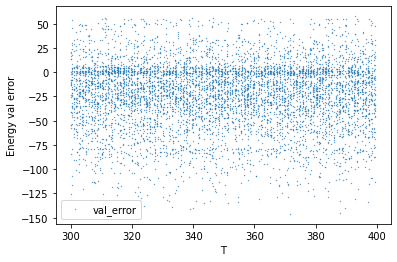

In [17]:
plt.scatter(x_test[:,0:1], pred_error, label='val_error', s=0.1)
plt.ylabel('Energy val error')
plt.xlabel('T')
plt.legend()

In [18]:
def get_values(output_type, phase, x_test, dbf, comps):
    import numpy as np
    import pycalphad
    from pycalphad import Database, calculate, variables as v
    from pycalphad.core.composition_set import CompositionSet
    from pycalphad.core.phase_rec import PhaseRecord
    from pycalphad.core.utils import unpack_components, instantiate_models
    from pycalphad.codegen.callables import build_phase_records
    import matplotlib.pyplot as plt
    species = sorted(unpack_components(dbf, comps), key=str)
    models = {}
    phase_records = {}

    if models.get(phase, None) is None:
        models[phase] = instantiate_models(dbf, species, [phase], parameters=None)[phase]
    if phase_records.get(phase, None) is None:
        phase_records[phase] = build_phase_records(dbf, species, [phase],
                                                    {v.T}, models, output=output_type, build_gradients=True, build_hessians=True)[phase]
    prx = phase_records[phase]
    out = np.zeros(x_test.shape[0])
    # print(out.shape, x_test.shape)
    prx.obj_2d(out, x_test)

    #pts = np.array([[[0.3, 0.3, 0.4]]])
    #res_GM = calculate(dbf, comps, 'LIQUID', T=x_test[:,0], P=1e5, N=1, pdens=10, output='GM', points=x_test[:,1:4])
    # print('test')
    # print(out)
    return out

print(x_test.shape)

out_GM = get_values('GM', phase, x_test, dbf, comps)
out_HM = get_values('HM', phase, x_test, dbf, comps)
out_SM = get_values('SM', phase, x_test, dbf, comps)

(6360, 4)


c:\Users\zhenyap\pycalphad\pycalphad\codegen\callables.py:94: UserWarning: State variables in `build_callables` are not {N, P, T}, but {T}. This can lead to incorrectly calculated values if the state variables used to call the generated functions do not match the state variables used to create them. State variables can be added with the `additional_statevars` argument.
  warnings.warn("State variables in `build_callables` are not {{N, P, T}}, but {}. This can lead to incorrectly "


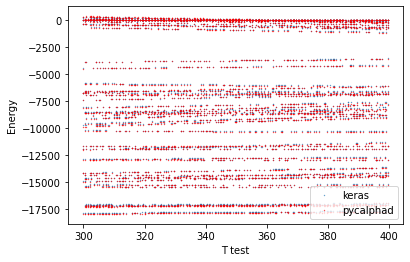

In [19]:
plt.scatter(x_test[:,0], pred, label='keras', s=0.1)
plt.scatter(x_test[:,0], out_GM, label='pycalphad', color='r', s = 0.1)
plt.ylabel('Energy')
plt.xlabel('T test')
plt.legend()
plt.savefig(phase+'-prediction_and_pycalphad-energy-'+save_string+'-.png')

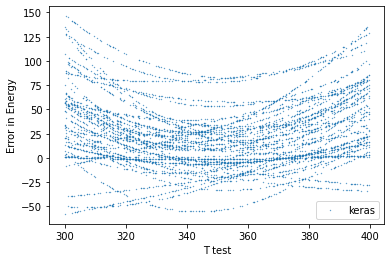

In [20]:
error_energy = pred - out_GM
error_energy_average = np.average(error_energy)
plt.scatter(x_test[:,0], error_energy, label='keras', s=0.1)
plt.ylabel('Error in Energy')
plt.xlabel('T test')
plt.legend()
plt.savefig(phase+'-error-in-energy-'+save_string+'-.png')

Plots

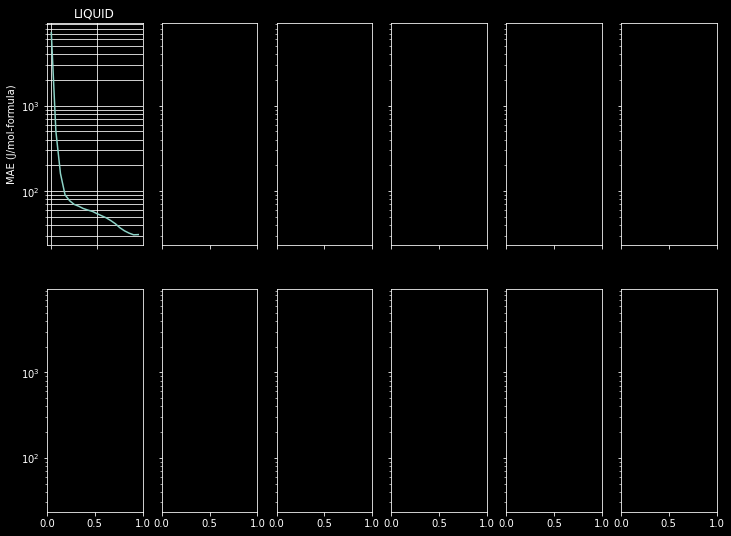

In [21]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

fig, axs = plt.subplots(2, len(dbf.phases) // 2, sharey=True, figsize=(12,9))

i = 0
for phase_name, x in results.items():
    ax = axs.flat[i]
    history = x[1]
    ax.plot(history.history['loss'])
    ax.set(xlabel='epoch', ylabel='MAE (J/mol-formula)', yscale='log')
    ax.set_title(phase_name)
    ax.grid(True, which='both')
    i += 1
for ax in axs.flat:
    ax.label_outer()

plt.savefig('All_phases'+save_string+'.png')

Checking the gradients

In [22]:
# grad = tape.gradient(model, [x0, x1, x2, x3])

# #G + T dGdT

# model.evaluate()

Function to calculate thermodynamics quantities

In [23]:
def ML_plots(dbf, comps, phase_name, fine_temps, pts):
    res = calculate(dbf, comps, phase_name, T=fine_temps, P=1e5, N=1, pdens=10, output='HM', points=pts)
    res.HM.shape
    res_SM = calculate(dbf, comps, phase_name, T=fine_temps, P=1e5, N=1, pdens=10, output='SM', points=pts)
    resSM = res_SM.SM
    res_GM = calculate(dbf, comps, phase_name, T=fine_temps, P=1e5, N=1, pdens=10, output='GM', points=pts)
    resGM = res_GM.GM
    tt, xx = np.broadcast_arrays(fine_temps[:, np.newaxis], np.squeeze(pts)[np.newaxis])
    inputs = np.concatenate((fine_temps[np.newaxis].T, xx), axis=1)
    gm_ml = model.predict(inputs)
    sm_ml = -np.gradient(gm_ml, fine_temps)
    hm_ml = gm_ml + fine_temps * sm_ml
    hm_ml = hm_ml[np.newaxis].T
    hm_ml.shape
    resHM = res.HM
    resSM = res_SM.SM
    resGM = res_GM.GM
    # print(resHM.shape)
    # print(resSM.shape)
    resHM = resHM[0,0,:,:]
    resSM = resSM[0,0,:,:]
    resGM = resGM[0,0,:,:]
    error_HM = resHM - hm_ml
    error_SM = resSM - sm_ml[np.newaxis].T
    error_GM = resGM - gm_ml[np.newaxis].T
    return resGM, resSM, resHM, error_GM, error_SM, error_HM

In progress: plotting all errors

LIQUID
7/7 [==============================] - 0s 3ms/step


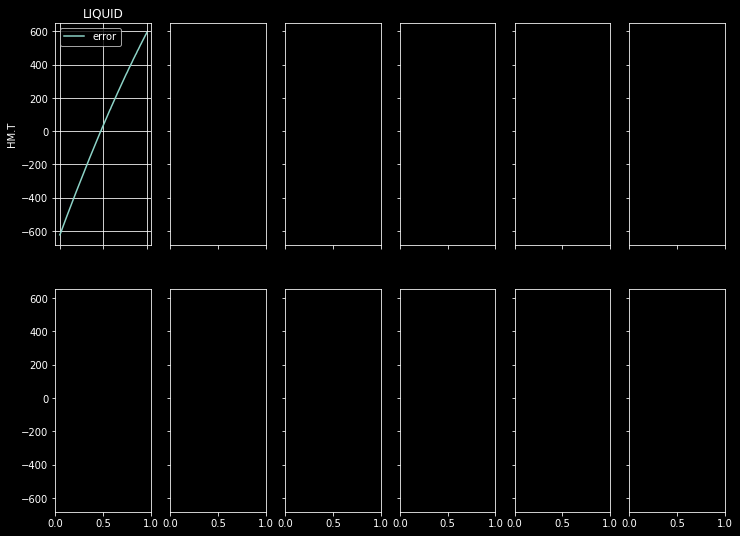

In [24]:
import numpy as np
import pycalphad
from pycalphad import Database, calculate, variables as v
import matplotlib.pyplot as plt

fine_temps = np.arange(starting_temp, max_temp, step)
# pts = np.array([[[0.3, 0.7, 0.7, 0.3]]])
# pts = np.array([[[1, 1]]])
pts = np.array([[[0.3, 0.3, 0.4]]])

plt.style.use('dark_background')

fig, axs = plt.subplots(2, len(dbf.phases) // 2, sharey=True, figsize=(12,9))

i = 0
for phase_name, x in results.items():
    print(phase_name)
    resGM, resSM, resHM, error_GM, error_SM, error_HM = ML_plots(dbf, comps, phase_name, fine_temps, pts)
    ax = axs.flat[i]
    ax.plot(fine_temps, error_HM, label='error')
    ax.set_ylabel('HM.T')
    ax.set_xlabel('T')
    ax.legend()
    ax.set_title(phase_name)
    ax.grid(True, which='both')
    i += 1
for ax in axs.flat:
    ax.label_outer()

plt.savefig('All_phases_HM'+save_string+'.png')

In [25]:
fine_temps

array([300. , 300.5, 301. , 301.5, 302. , 302.5, 303. , 303.5, 304. ,
       304.5, 305. , 305.5, 306. , 306.5, 307. , 307.5, 308. , 308.5,
       309. , 309.5, 310. , 310.5, 311. , 311.5, 312. , 312.5, 313. ,
       313.5, 314. , 314.5, 315. , 315.5, 316. , 316.5, 317. , 317.5,
       318. , 318.5, 319. , 319.5, 320. , 320.5, 321. , 321.5, 322. ,
       322.5, 323. , 323.5, 324. , 324.5, 325. , 325.5, 326. , 326.5,
       327. , 327.5, 328. , 328.5, 329. , 329.5, 330. , 330.5, 331. ,
       331.5, 332. , 332.5, 333. , 333.5, 334. , 334.5, 335. , 335.5,
       336. , 336.5, 337. , 337.5, 338. , 338.5, 339. , 339.5, 340. ,
       340.5, 341. , 341.5, 342. , 342.5, 343. , 343.5, 344. , 344.5,
       345. , 345.5, 346. , 346.5, 347. , 347.5, 348. , 348.5, 349. ,
       349.5, 350. , 350.5, 351. , 351.5, 352. , 352.5, 353. , 353.5,
       354. , 354.5, 355. , 355.5, 356. , 356.5, 357. , 357.5, 358. ,
       358.5, 359. , 359.5, 360. , 360.5, 361. , 361.5, 362. , 362.5,
       363. , 363.5,

In [26]:
import numpy as np
import pycalphad
from pycalphad import Database, calculate, variables as v
import matplotlib.pyplot as plt
# model = results['LIQUID'][0]

fine_temps = np.arange(starting_temp, max_temp, step)
print(fine_temps.shape)
# pts = np.array([[[0.2, 0.4, 0.3, 0.1]]])
# pts = np.array([[[0.3, 0.3, 0.4]]])

res = calculate(dbf, comps, phase, T=fine_temps, P=1e5, N=1, pdens=10, output='HM', points=pts)
res.HM.shape
res_SM = calculate(dbf, comps, phase, T=fine_temps, P=1e5, N=1, pdens=10, output='SM', points=pts)
resSM = res_SM.SM
res_GM = calculate(dbf, comps, phase, T=fine_temps, P=1e5, N=1, pdens=10, output='GM', points=pts)
resGM = res_GM.GM
tt, xx = np.broadcast_arrays(fine_temps[:, np.newaxis], np.squeeze(pts)[np.newaxis])
inputs = np.concatenate((fine_temps[np.newaxis].T, xx), axis=1)
print(inputs)
print('step')
gm_ml = model.predict(inputs)
sm_ml = -np.gradient(gm_ml, fine_temps)
print(gm_ml.shape)
hm_ml = gm_ml + fine_temps * sm_ml
hm_ml = hm_ml[np.newaxis].T
hm_ml.shape
resHM = res.HM
print('enthalpy', resHM.shape)
resSM = res_SM.SM
resGM = res_GM.GM
print(resHM.shape)
print(resSM.shape)
resHM = resHM[0,0,:,:]
resSM = resSM[0,0,:,:]
resGM = resGM[0,0,:,:]
error_HM = resHM - hm_ml
error_SM = resSM - sm_ml[np.newaxis].T
error_GM = resGM - gm_ml[np.newaxis].T

(200,)
[[3.000e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.005e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.010e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.015e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.020e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.025e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.030e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.035e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.040e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.045e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.050e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.055e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.060e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.065e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.070e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.075e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.080e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.085e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.090e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.095e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.100e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.105e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.110e+02 3.000e-01 3.000e-01 4.000e-01]
 [3.

To get the ML values

In [27]:
import tensorflow as tf

# gradients = tf.gradients(model.predict(inputs), inputs)

tt, xx = np.broadcast_arrays(fine_temps[:, np.newaxis], np.squeeze(pts)[np.newaxis])
inputs = np.concatenate((fine_temps[np.newaxis].T, xx), axis=1)


import tensorflow as tf
def grad_ML(inputs, model):
    tfinputs = tf.convert_to_tensor(inputs)

    with tf.GradientTape() as t:
      t.watch(tfinputs)
      output = model(tfinputs)

    dz_dx = t.gradient(output, tfinputs)
    print(dz_dx.numpy())
    gradient_T = dz_dx.numpy()[:,0:1]
    print(gradient_T.shape)
    return gradient_T

# gradient_T = grad_ML(inputs, model)
# hm_ml_grad = gm_ml + fine_temps * -gradient_T.T
# hm_ml_grad = hm_ml_grad.T
# hm_ml_grad.shape
# error_HM_ml = resHM - hm_ml_grad

gradient_T = grad_ML(x_test, model)
hm_ml_grad = (pred[np.newaxis].T + (x_test[:,0] * -gradient_T.T).T)
print('Shape of hm', hm_ml_grad.shape)
error_HM_ml = out_HM[np.newaxis].T - hm_ml_grad


[[-1.20705895e-01 -4.80283281e+04 -2.29425949e+02 -3.72820801e+02]
 [ 4.44179821e+00 -4.51477812e+04 -4.35753594e+04 -2.58420586e+04]
 [-8.91422033e-01 -6.65882812e+04 -1.37363977e+03 -6.93331348e+03]
 ...
 [ 3.01198149e+00 -4.75600039e+04 -4.23270391e+04 -4.20343359e+04]
 [ 1.26123846e-01 -4.48421367e+04 -2.16681250e+03 -3.08182190e+02]
 [ 1.27183712e+00 -1.05623652e+04 -6.45165977e+04 -4.59005234e+04]]
(6360, 1)
Shape of hm (6360, 1)


In [28]:
x_test[:,0:1].shape, error_HM_ml.shape, out_HM.shape

((6360, 1), (6360, 1), (6360,))

To get the error

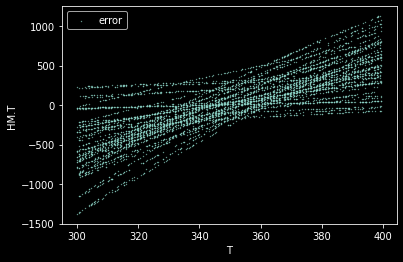

In [29]:
# plt.plot(fine_temps, error_HM_ml, label='error')
# plt.ylabel('HM.T')
# plt.xlabel('T')
# plt.legend()
# # plt.savefig(phase+'-enthalpy-error'+save_string+'-.png')

plt.scatter(x_test[:,0:1], error_HM_ml, label='error', s=0.1)
plt.ylabel('HM.T')
plt.xlabel('T')
plt.legend()
# plt.savefig(phase+'-enthalpy-error'+save_string+'-.png')

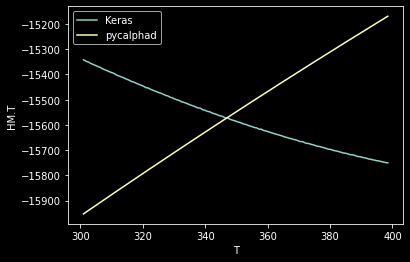

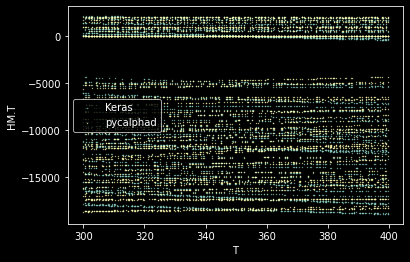

In [30]:
plt.figure(0)
plt.plot(fine_temps[2:-2], hm_ml[2:-2], label='Keras')
plt.plot(fine_temps[2:-2], resHM[2:-2], label='pycalphad')
plt.ylabel('HM.T')
plt.xlabel('T')
plt.legend()
plt.savefig(phase+'-enthalpy'+save_string+'.png')

plt.figure(1)
plt.scatter(x_test[:,0], hm_ml_grad, label='Keras', s=0.1)
plt.scatter(x_test[:,0], out_HM, label='pycalphad', s=0.1)
plt.ylabel('HM.T')
plt.xlabel('T')
plt.legend()
plt.savefig(phase+'-enthalpy-gradient_tap-'+save_string+'.png')

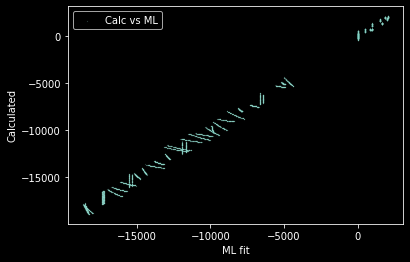

In [31]:
# plt.plot(resHM[2:-2], hm_ml[2:-2], label='Calc vs ML')
# plt.ylabel('Calculated')
# plt.xlabel('ML fit')
# plt.legend()
# plt.savefig(phase+'-enthalpy-calc_vs_ml-'+save_string+'.png')

plt.scatter(out_HM, hm_ml_grad, label='Calc vs ML', s=0.01)
plt.ylabel('Calculated')
plt.xlabel('ML fit')
plt.legend()
# plt.savefig(phase+'-enthalpy-calc_vs_ml-'+save_string+'.png')

Energy comparison

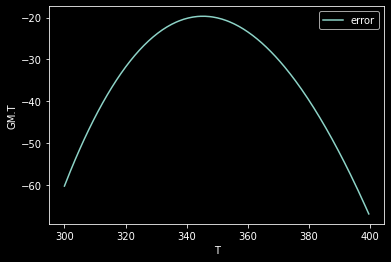

In [32]:
plt.plot(fine_temps, error_GM, label='error')
plt.ylabel('GM.T')
plt.xlabel('T')
plt.legend()
plt.savefig(phase+'-energy-error'+save_string+'-.png')

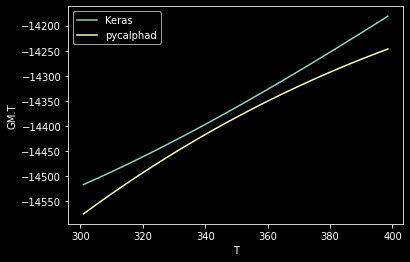

In [33]:
plt.plot(fine_temps[2:-2], gm_ml[2:-2], label='Keras')
plt.plot(fine_temps[2:-2], resGM[2:-2], label='pycalphad')
plt.ylabel('GM.T')
plt.xlabel('T')
plt.legend()
plt.savefig(phase+'-energy'+save_string+'-.png')

Entropy comparison

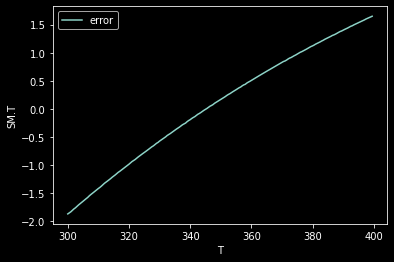

In [34]:
plt.plot(fine_temps, error_SM, label='error')
plt.ylabel('SM.T')
plt.xlabel('T')
plt.legend()
plt.savefig(phase+'-entropy-error'+save_string+'-.png')

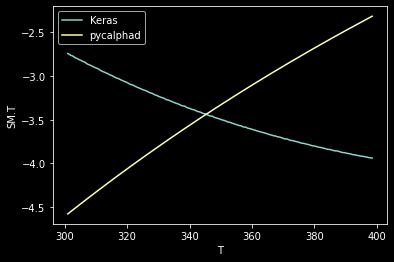

In [35]:
plt.plot(fine_temps[2:-2], sm_ml[2:-2], label='Keras')
plt.plot(fine_temps[2:-2], resSM[2:-2], label='pycalphad')
plt.ylabel('SM.T')
plt.xlabel('T')
plt.legend()
plt.savefig(phase+'-entropy'+save_string+'.png')

In [36]:
# fine_temps = np.arange(300, 600, 10)


# res = calculate(dbf, comps[0], 'LIQUID', T=temp_range, P=1e5, N=1, model=mod, pdens=10, output='HM')

# # fine_energies = np.array([float(dbf.symbols['GHSERZN'].xreplace({v.T: t})) for t in fine_temps])
# # gm_calphad = fine_energies
# # sm_calphad = -np.gradient(gm_calphad, fine_temps)
# # hm_calphad = gm_calphad + fine_temps * sm_calphad
# # cpm_calphad = np.gradient(hm_calphad, fine_temps)

# gm_ml = model.predict(fine_temps)
# sm_ml = -np.gradient(gm_ml, fine_temps)
# hm_ml = gm_ml + fine_temps * sm_ml
# # cpm_ml = np.gradient(hm_ml, fine_temps)

# error = hm_ml-res.hm

# plt.plot(fine_temps[2:-2], cpm_ml[2:-2], label='Keras')
# plt.plot(fine_temps[2:-2], cpm_calphad[2:-2], label='pycalphad')
# plt.ylabel('HM.T')
# plt.xlabel('T')
# plt.legend()